In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data_train.csv').values
df

array([[ 73,  80,  75, 152],
       [ 93,  88,  93, 185],
       [ 89,  91,  90, 180],
       [ 96,  98, 100, 196],
       [ 73,  66,  70, 142],
       [ 53,  46,  55, 101],
       [ 69,  74,  77, 149],
       [ 47,  56,  60, 115],
       [ 87,  79,  90, 175],
       [ 79,  70,  88, 164],
       [ 69,  70,  73, 141],
       [ 70,  65,  74, 141],
       [ 93,  95,  91, 184],
       [ 79,  80,  73, 152],
       [ 70,  73,  78, 148],
       [ 93,  89,  96, 192],
       [ 78,  75,  68, 147],
       [ 81,  90,  93, 183],
       [ 88,  92,  86, 177],
       [ 78,  83,  77, 159],
       [ 82,  86,  90, 177],
       [ 86,  82,  89, 175],
       [ 78,  83,  85, 175]], dtype=int64)

In [3]:
x1 = df[:,0]
x2 = df[:,1]
x3 = df[:,2]
X_train = df[:,:3]
Y_train = df[:,3:]
print(X_train,Y_train)
print(X_train.shape, Y_train.shape)

[[ 73  80  75]
 [ 93  88  93]
 [ 89  91  90]
 [ 96  98 100]
 [ 73  66  70]
 [ 53  46  55]
 [ 69  74  77]
 [ 47  56  60]
 [ 87  79  90]
 [ 79  70  88]
 [ 69  70  73]
 [ 70  65  74]
 [ 93  95  91]
 [ 79  80  73]
 [ 70  73  78]
 [ 93  89  96]
 [ 78  75  68]
 [ 81  90  93]
 [ 88  92  86]
 [ 78  83  77]
 [ 82  86  90]
 [ 86  82  89]
 [ 78  83  85]] [[152]
 [185]
 [180]
 [196]
 [142]
 [101]
 [149]
 [115]
 [175]
 [164]
 [141]
 [141]
 [184]
 [152]
 [148]
 [192]
 [147]
 [183]
 [177]
 [159]
 [177]
 [175]
 [175]]
(23, 3) (23, 1)


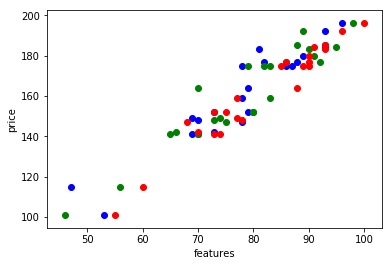

In [5]:
%matplotlib inline
plt.xlabel('features')
plt.ylabel('price')
plt.scatter(x1,Y_train,c='b')
plt.scatter(x2,Y_train,c='g')
plt.scatter(x3,Y_train,c='r')
plt.show()

In [6]:
ones = np.ones_like(Y_train)
X_train = np.concatenate((X_train, ones), axis=1)
print(X_train)
print(X_train.shape,Y_train.shape)

[[ 73  80  75   1]
 [ 93  88  93   1]
 [ 89  91  90   1]
 [ 96  98 100   1]
 [ 73  66  70   1]
 [ 53  46  55   1]
 [ 69  74  77   1]
 [ 47  56  60   1]
 [ 87  79  90   1]
 [ 79  70  88   1]
 [ 69  70  73   1]
 [ 70  65  74   1]
 [ 93  95  91   1]
 [ 79  80  73   1]
 [ 70  73  78   1]
 [ 93  89  96   1]
 [ 78  75  68   1]
 [ 81  90  93   1]
 [ 88  92  86   1]
 [ 78  83  77   1]
 [ 82  86  90   1]
 [ 86  82  89   1]
 [ 78  83  85   1]]
(23, 4) (23, 1)


In [7]:
def grad_cal(X, Y, theta_gd, m):
    """
    X: X's value
    Y: Y's value
    theta_gd: theta's value
    m: number of samples
    """    
    g = 1/m * X.T.dot(X.dot(theta_gd) - Y)
    return g.reshape(theta_gd.shape)
def loss(X, Y, theta_gd, m):
    """
    X: X's value
    Y: Y's value
    theta_gd: theta's value
    m: number of samples
    """
    return 1/(2*m) * np.sum((X.dot(theta_gd) - Y)**2)

In [11]:
m = len(Y_train)
print(m)
learning_rate = 0.0001
theta_gd = np.random.normal(size=4).reshape([4,1])
print(theta_gd)

23
[[ 1.25115   ]
 [-0.05036668]
 [ 0.84848795]
 [ 0.61604092]]


In [13]:
import math
grad_list = []
loss_list = []
for i in range(10000):
    grad_value = grad_cal(X_train, Y_train, theta_gd, m)
    theta_gd = theta_gd - learning_rate*grad_value
    loss_list.append(loss(X_train, Y_train, theta_gd, m))
    grad_list.append(grad_value)
print(theta_gd)

[[0.34509274]
 [0.56725208]
 [1.09549183]
 [0.53671618]]


In [14]:
print(np.array(loss_list))

[13.96898733 13.66001787 13.38618067 ...  3.19485292  3.19485227
  3.19485162]


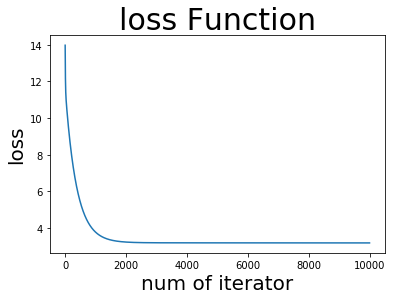

In [15]:
plt.title('loss Function', size = 30)
plt.xlabel('num of iterator', size = 20)
plt.ylabel('loss', size = 20)
plt.plot(loss_list)
plt.show()

In [16]:
def predict(X):
    return X.dot(theta_gd)
X_new_1 = np.array([[70, 73, 79,1]])
predict(X_new_1)

array([[152.64646463]])

In [17]:
def get_loss_value(input, outcome, w):
    cost = 0
    y_hat = np.dot(input, w)
    for x, y in zip(outcome, y_hat):
        print('Outcome:', x[0], 'Predict:', y[0])
        cost += pow(x[0] - y[0], 2)
    return cost / 2
print('Loss value:', get_loss_value(X_train,Y_train,theta_gd))

Outcome: 152 Predict: 153.27054005925524
Outcome: 185 Predict: 184.42926452268662
Outcome: 180 Predict: 181.46417428600847
Outcome: 196 Predict: 198.80550636032382
Outcome: 142 Predict: 139.85155180532976
Outcome: 101 Predict: 105.1722779185839
Outcome: 149 Predict: 150.67764030001211
Outcome: 115 Predict: 114.25170141628817
Outcome: 175 Predict: 173.96696387672176
Outcome: 164 Predict: 163.9099695828515
Outcome: 141 Predict: 144.02666465299046
Outcome: 141 Predict: 142.63098884252466
Outcome: 184 Predict: 186.20904539432425
Outcome: 152 Predict: 153.1501128374882
Outcome: 148 Predict: 151.55097279850116
Outcome: 192 Predict: 188.28299210347544
Outcome: 147 Predict: 144.49130053750008
Outcome: 183 Predict: 181.42265578263138
Outcome: 177 Predict: 177.30436628396933
Outcome: 159 Predict: 158.88874366606007
Outcome: 177 Predict: 176.2122647113375
Outcome: 175 Predict: 174.22813553271016
Outcome: 175 Predict: 167.65267834219364
Loss value: 73.48158736817078
